***AE1***

**Load and pre-processing text**

Load and preprocess the text data, converting it to i) lowercase, ii) removing special
characters, iii) digits, and iv) redundant whitespace, v) list of words and vi) excluding
meaningless words.

In [14]:
#import necessary libraries
import numpy as np
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#load and read the dataset
music_df = pd.read_csv("spotify_millsongdata.csv")

#dataset
music_df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [16]:
#Lowercase artist and song name
artist_lower = music_df['artist'].str.lower()
song_lower = music_df['song'].str.lower()
text_lower = music_df['text'].str.lower()

#Replace artist and song name in DataFrame with lowercase
#music_df = music_df.str.lower()
music_df['artist'] = artist_lower
music_df['song'] = song_lower
music_df['text'] = text_lower
music_df
#music_lower_df.head()

,artist,song,link,text
0,abba,ahe's my kind of girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"look at her face, it's a wonderful face \r\na..."
1,abba,"andante, andante",/a/abba/andante+andante_20002708.html,"take it easy with me, please \r\ntouch me gen..."
2,abba,as good as new,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go \r\nwhy i had...
3,abba,bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...
4,abba,bang-a-boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...
...,...,...,...,...
57645,ziggy marley,good old days,/z/ziggy+marley/good+old+days_10198588.html,irie days come on play \r\nlet the angels fly...
57646,ziggy marley,hand to mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,power to the workers \r\nmore power \r\npowe...
57647,zwan,come with me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,zwan,desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [17]:
#Ask user for which artists they want to analyze
artist1 = input("Enter artist 1:")
artist2 = input("Enter artist 2:")

artist_list = [artist1.lower(), artist2.lower()]

In [18]:
#create a new DataFrame with only the inputted artist
cleaned_df = music_df.copy()
cleaned_df = cleaned_df[cleaned_df['artist'].isin(artist_list)]
cleaned_df.fillna('', inplace=True)

cleaned_df

,artist,song,link,text
0,abba,ahe's my kind of girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"look at her face, it's a wonderful face \r\na..."
1,abba,"andante, andante",/a/abba/andante+andante_20002708.html,"take it easy with me, please \r\ntouch me gen..."
2,abba,as good as new,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go \r\nwhy i had...
3,abba,bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...
4,abba,bang-a-boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...
...,...,...,...,...
52781,taylor swift,tim mcgraw,/t/taylor+swift/tim+mcgraw_20359673.html,he said the way my blue eyes shined \r\nput t...
52782,taylor swift,today was a fairytale,/t/taylor+swift/today+was+a+fairytale_20761546...,today was a fairytale \r\nyou were the prince...
52783,taylor swift,white christmas,/t/taylor+swift/white+christmas_20658358.html,i'm dreaming of a white christmas \r\njust li...
52784,taylor swift,white horse,/t/taylor+swift/white+horse_20761227.html,say you're sorry \r\nthat face of an angel \...


In [19]:
#Unnecessary text
MEANINGLESS = ["i", "a", "an", "and", "the", "on", "of", "in", "with", "you",
               "me", "to", "at", "for", "[", "]", "(", ")", "?", "!", "-", " "]

def clean_text(song):
    song = re.sub(r'[^a-zA-Z\s]', '', song)
    song = ' '.join([word for word in song.split() if word not in MEANINGLESS])
    return song


cleaned_df['text'] = cleaned_df['text'].apply(clean_text)
cleaned_df

,artist,song,link,text
0,abba,ahe's my kind of girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look her face its wonderful face it means some...
1,abba,"andante, andante",/a/abba/andante+andante_20002708.html,take it easy please touch gently like summer e...
2,abba,as good as new,/a/abba/as+good+as+new_20003033.html,ill never know why had go why had put up such ...
3,abba,bang,/a/abba/bang_20598415.html,making somebody happy is question give take ca...
4,abba,bang-a-boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is question give take ca...
...,...,...,...,...
52781,taylor swift,tim mcgraw,/t/taylor+swift/tim+mcgraw_20359673.html,he said way my blue eyes shined put those geor...
52782,taylor swift,today was a fairytale,/t/taylor+swift/today+was+a+fairytale_20761546...,today was fairytale were prince used be damsel...
52783,taylor swift,white christmas,/t/taylor+swift/white+christmas_20658358.html,im dreaming white christmas just like ones use...
52784,taylor swift,white horse,/t/taylor+swift/white+horse_20761227.html,say youre sorry that face angel comes out just...


**Analyzing text**

Analyse the processed song lyrics of each specified artist by i) counting the
frequency of words, ii) determining the vocabulary richness, iii) scoring the sentiment
of song lyrics, and iv) identifying any common words between artists.

In [20]:
#Grouping songs by artist
cleaned_group_df = cleaned_df.copy().groupby('artist').sum()
cleaned_group_df

,song,link,text
artist,,,
abba,"ahe's my kind of girlandante, andanteas good a...",/a/abba/ahes+my+kind+of+girl_20598417.html/a/a...,look her face its wonderful face it means some...
taylor swift,cold as youcraziereverything has changedfiftee...,/t/taylor+swift/cold+as+you_20359713.html/t/ta...,have way coming easily when take take very bes...


In [21]:
#function used to count the frequency of words
def calculate_frequency(song):
    word_frequency = {} #Empty dictionary
    words = song.split()
    for word in words:
        if word_frequency.get(word) is None: #Check if word is in dictionary
            word_frequency[word] = 1 #if not add it and set its count to 1
        else:
            word_frequency[word] = word_frequency[word] + 1 #if in dictionary already add a count
    return word_frequency

#counting frequency of words for songs
song1_frequency = calculate_frequency(cleaned_df['text'][0])
song2_frequency = calculate_frequency(cleaned_df['text'][1])

#word frequency of words for artists
artist1_frequency = calculate_frequency(cleaned_group_df['text'][0])
artist2_frequency = calculate_frequency(cleaned_group_df['text'][1])

print(song1_frequency)

{'look': 2, 'her': 3, 'face': 2, 'its': 1, 'wonderful': 1, 'it': 1, 'means': 1, 'something': 1, 'special': 1, 'way': 1, 'that': 4, 'she': 9, 'smiles': 1, 'when': 2, 'sees': 1, 'how': 1, 'lucky': 1, 'can': 1, 'one': 1, 'fellow': 1, 'be': 3, 'shes': 4, 'just': 4, 'my': 5, 'kind': 4, 'girl': 4, 'makes': 2, 'feel': 2, 'fine': 2, 'who': 2, 'could': 8, 'ever': 4, 'believe': 2, 'mine': 2, 'without': 2, 'im': 2, 'blue': 2, 'if': 2, 'leaves': 2, 'what': 4, 'do': 4, 'we': 2, 'go': 2, 'walk': 1, 'park': 1, 'holds': 1, 'squeezes': 1, 'hand': 1, 'well': 1, 'walking': 1, 'hours': 1, 'talking': 1, 'about': 1, 'all': 1, 'things': 1, 'plan': 1}


In [22]:
#Determining the vocabulary richness
def vocab_richness(song):
    return len(calculate_frequency(song))/len(song) #Number of unique words / number of total words

#Vocab richness of a song
print(vocab_richness(cleaned_df['text'][0]))

#Vocab richness of an artist
print(vocab_richness(cleaned_group_df['text'][0]))

0.0945945945945946
0.02127789880749276


In [23]:
#Updating the cleaned non-grouped dataset with the vocab richness scores or each song
y = []

for song in cleaned_df['text']:
    y.append(vocab_richness(song))
cleaned_df['richness'] = y
cleaned_df

,artist,song,link,text,richness
0,abba,ahe's my kind of girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look her face its wonderful face it means some...,0.094595
1,abba,"andante, andante",/a/abba/andante+andante_20002708.html,take it easy please touch gently like summer e...,0.056622
2,abba,as good as new,/a/abba/as+good+as+new_20003033.html,ill never know why had go why had put up such ...,0.082984
3,abba,bang,/a/abba/bang_20598415.html,making somebody happy is question give take ca...,0.079836
4,abba,bang-a-boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is question give take ca...,0.080564
...,...,...,...,...,...
52781,taylor swift,tim mcgraw,/t/taylor+swift/tim+mcgraw_20359673.html,he said way my blue eyes shined put those geor...,0.077139
52782,taylor swift,today was a fairytale,/t/taylor+swift/today+was+a+fairytale_20761546...,today was fairytale were prince used be damsel...,0.062546
52783,taylor swift,white christmas,/t/taylor+swift/white+christmas_20658358.html,im dreaming white christmas just like ones use...,0.074163
52784,taylor swift,white horse,/t/taylor+swift/white+horse_20761227.html,say youre sorry that face angel comes out just...,0.098734


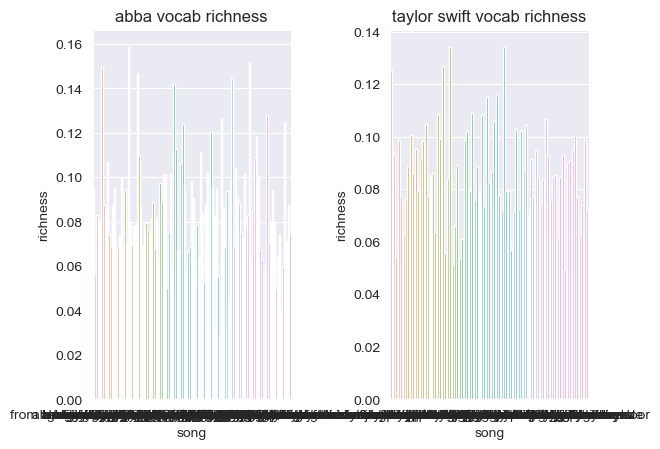

In [24]:
#Get the artist's names
artist1 = cleaned_group_df.index[0]
artist2 = cleaned_group_df.index[1]

#Seperate the songs by artist into new dataframes
df_artist1 = cleaned_df[cleaned_df['artist'] == artist1]
df_artist2 = cleaned_df[cleaned_df['artist'] == artist2]

#Making barplots of the vocabulary richness of each artist
fig, axs = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.5)
axs[0].set_title(f"{cleaned_group_df.index[0]} vocab richness")
axs[1].set_title(f"{cleaned_group_df.index[1]} vocab richness")

sns.barplot(x='song', y='richness', data=df_artist1, ax=axs[0])
sns.barplot(x='song', y='richness', data=df_artist2, ax=axs[1])

plt.show()

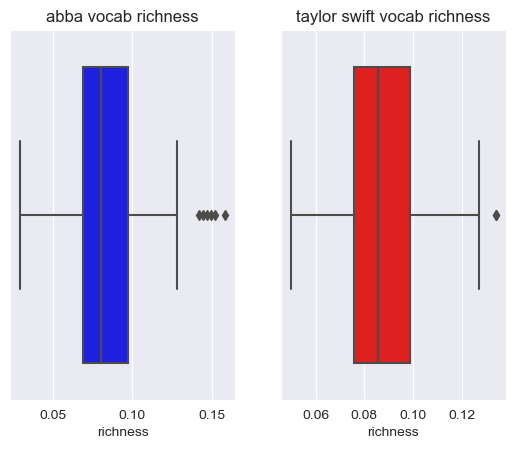

In [25]:
# Create subplots
fig, axs = plt.subplots(1, 2)

# Boxplot for artist1
axs[0].set_title(f"{artist1} vocab richness")
sns.boxplot(x='richness', data=df_artist1, ax=axs[0], color='blue')

# Boxplot for artist2
axs[1].set_title(f"{artist2} vocab richness")
sns.boxplot(x='richness', data=df_artist2, ax=axs[1], color='red')

plt.show()

Looking at ABBA and Taylor Swift, there is a positive vocabulary richness for both artists. However, for both it is a very small vocabulary richness with both not even going past .2.

In [26]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\max\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
#Sentiment analysis scsorer
def sentiment_analysis(song):
    sia = SentimentIntensityAnalyzer()
    
    sentiment_scores = sia.polarity_scores(song)

    s_score = sentiment_scores['compound']

    if s_score >= 0.05:
        sentiment = 'Positive'
    elif s_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
        
    return s_score, sentiment

In [28]:
print(sentiment_analysis(cleaned_df['text'][0]))

(0.9859, 'Positive')


In [29]:
#Updating the cleaned non-grouped dataset with the sentiment scores or each song
y = []

for song in cleaned_df['text']:
    y.append(sentiment_analysis(song))
cleaned_df['sentiment'] = y
cleaned_df

,artist,song,link,text,richness,sentiment
0,abba,ahe's my kind of girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look her face its wonderful face it means some...,0.094595,"(0.9859, Positive)"
1,abba,"andante, andante",/a/abba/andante+andante_20002708.html,take it easy please touch gently like summer e...,0.056622,"(0.9927, Positive)"
2,abba,as good as new,/a/abba/as+good+as+new_20003033.html,ill never know why had go why had put up such ...,0.082984,"(0.9986, Positive)"
3,abba,bang,/a/abba/bang_20598415.html,making somebody happy is question give take ca...,0.079836,"(0.9969, Positive)"
4,abba,bang-a-boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is question give take ca...,0.080564,"(0.9972, Positive)"
...,...,...,...,...,...,...
52781,taylor swift,tim mcgraw,/t/taylor+swift/tim+mcgraw_20359673.html,he said way my blue eyes shined put those geor...,0.077139,"(0.9974, Positive)"
52782,taylor swift,today was a fairytale,/t/taylor+swift/today+was+a+fairytale_20761546...,today was fairytale were prince used be damsel...,0.062546,"(0.9943, Positive)"
52783,taylor swift,white christmas,/t/taylor+swift/white+christmas_20658358.html,im dreaming white christmas just like ones use...,0.074163,"(0.9788, Positive)"
52784,taylor swift,white horse,/t/taylor+swift/white+horse_20761227.html,say youre sorry that face angel comes out just...,0.098734,"(0.6522, Positive)"


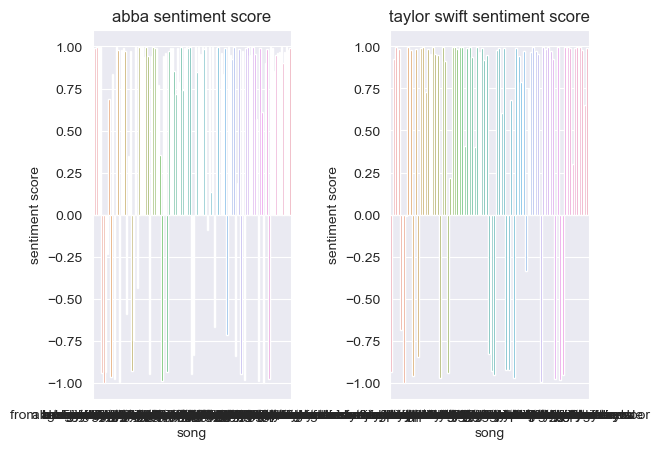

In [30]:
#Artist names
artist1 = cleaned_group_df.index[0]
artist2 = cleaned_group_df.index[1]

#Seperete songs by artist and into new data frames
df_artist1 = cleaned_df[cleaned_df['artist'] == artist1].copy()
df_artist2 = cleaned_df[cleaned_df['artist'] == artist2].copy()

#Get the numerical part of the sentiment scorer
df_artist1['sentiment score'] = df_artist1['sentiment'].apply(lambda x: x[0])
df_artist2['sentiment score'] = df_artist2['sentiment'].apply(lambda x: x[0])

#Createt the barplots
fig, axs = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.5)
axs[0].set_title(f"{cleaned_group_df.index[0]} sentiment score")
axs[1].set_title(f"{cleaned_group_df.index[1]} sentiment score")

sns.barplot(x='song', y='sentiment score', data=df_artist1, ax=axs[0])
sns.barplot(x='song', y='sentiment score', data=df_artist2, ax=axs[1])

plt.show()

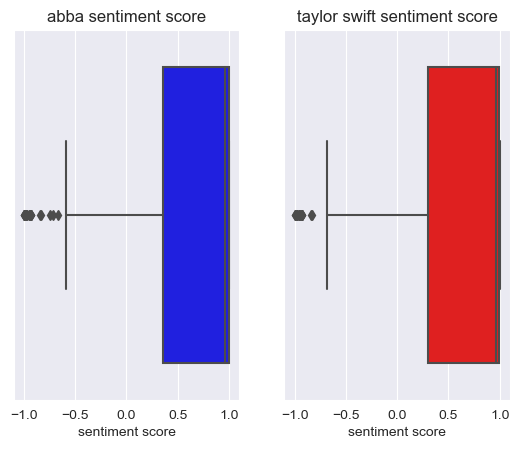

In [31]:
# Create subplots
fig, axs = plt.subplots(1, 2)

# Boxplot for artist1
axs[0].set_title(f"{artist1} sentiment score")
sns.boxplot(x='sentiment score', data=df_artist1, ax=axs[0], color='blue')

# Boxplot for artist2
axs[1].set_title(f"{artist2} sentiment score")
sns.boxplot(x='sentiment score', data=df_artist2, ax=axs[1], color='red')

plt.show()

Looking at ABBA and Taylor Swift again we can see mostly positive sentiment scores. Both score very high with both having medians and maximums at 1 with outliers in the negatives close to -1. This shows that both artists typically write songs near the extreme levels of sentiment. The songs are generally very positive or very negative.

In [32]:
#Empty dictionaries for common words
common_words = []
artist1 = calculate_frequency(cleaned_group_df['text'][0])
artist2 = calculate_frequency(cleaned_group_df['text'][1])
for word in artist1:
    if artist2.get(word) is not None:
        common_words.append(word)

print(common_words)

['look', 'her', 'face', 'its', 'wonderful', 'it', 'means', 'something', 'special', 'way', 'that', 'she', 'smiles', 'when', 'how', 'lucky', 'can', 'one', 'be', 'shes', 'just', 'my', 'kind', 'girl', 'makes', 'feel', 'fine', 'who', 'could', 'ever', 'believe', 'mine', 'without', 'im', 'blue', 'if', 'leaves', 'what', 'do', 'we', 'go', 'walk', 'park', 'holds', 'hand', 'well', 'walking', 'hours', 'talking', 'about', 'all', 'things', 'plan', 'easy', 'please', 'touch', 'like', 'summer', 'take', 'your', 'time', 'make', 'slow', 'let', 'feeling', 'grow', 'fingers', 'soft', 'light', 'night', 'soul', 'know', 'now', 'music', 'am', 'song', 'play', 'again', 'strong', 'cause', 'youre', 'making', 'sing', 'sound', 'ground', 'oh', 'dont', 'down', 'theres', 'eyes', 'thousand', 'butterflies', 'talk', 'away', 'never', 'why', 'had', 'put', 'up', 'show', 'boy', 'was', 'tough', 'saying', 'need', 'anymore', 'ive', 'enough', 'standing', 'here', 'found', 'out', 'life', 'is', 'gotta', 'have', 'near', 'as', 'good', '

**Visualising text**

Visualise the analysed data by i) generating word clouds for each artist, ii) plotting
sentiment scores in a scatter plot, and iii) creating a heat map to show word overlap
between artists.

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Word Cloud based on words alone
def word_cloud():
    cloud = WordCloud()
    cloud1 = WordCloud()
    artist1_cloud = cloud.generate(cleaned_group_df['text'][0])
    artist2_cloud = cloud1.generate(cleaned_group_df['text'][1])

    fig, axs = plt.subplots(1, 2)
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(cleaned_group_df.index[0])
    axs[1].set_title(cleaned_group_df.index[1])
    axs[0].imshow(artist1_cloud)
    axs[1].imshow(artist2_cloud)
    plt.show()

#Word Cloud based on frequency of words
def word_cloud_frequency():
    artist1_words = calculate_frequency(cleaned_group_df['text'][0])
    artist2_words = calculate_frequency(cleaned_group_df['text'][1])
    #print(artist1_words)
    #print(artist2_words)
    
    cloud = WordCloud()
    cloud1 = WordCloud()
    
    artist1_cloud = cloud.generate_from_frequencies(artist1_words)
    artist2_cloud = cloud1.generate_from_frequencies(artist2_words)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f"{cleaned_group_df.index[0]} (frequency)")
    axs[1].set_title(f"{cleaned_group_df.index[1]} (frequency)")
    axs[0].imshow(artist1_cloud)
    axs[1].imshow(artist2_cloud)
    plt.show()


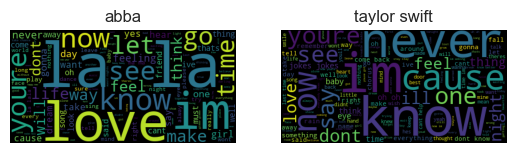

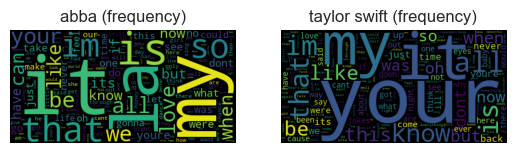

In [34]:
word_cloud()
word_cloud_frequency()
# Save the cloud image to a file
#cloud.to_file('WC.png')

C:\Users\max\anaconda3\envs\AE1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\max\anaconda3\envs\AE1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'taylor swift Richness x Sentiment')

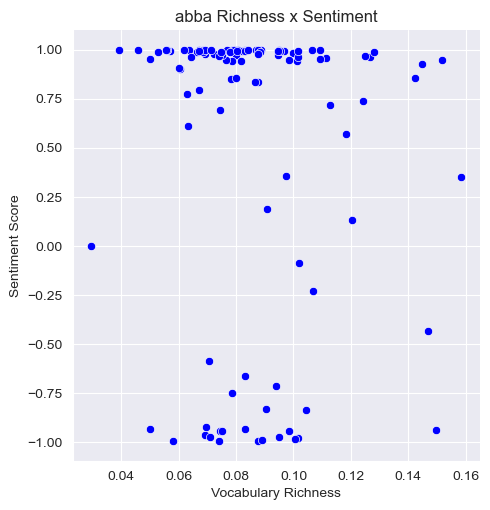

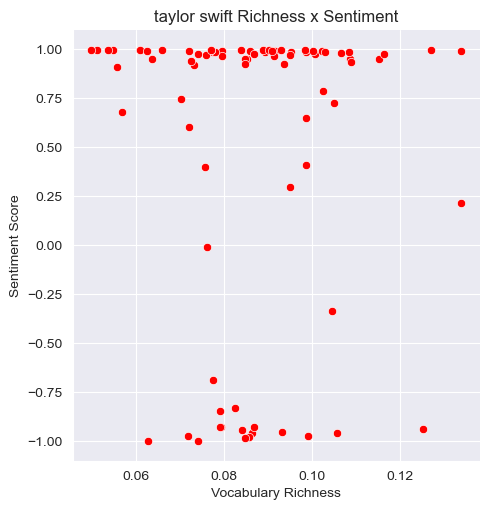

In [35]:
#Get the names of the two artists
artist1 = cleaned_group_df.index[0]
artist2 = cleaned_group_df.index[1]

#Create empty lists for artist sentiment and richness
artist1_sentiment = []
artist2_sentiment = []
artist1_richness = []
artist2_richness = []

#Get the sentiment and vocab richness of each song for each artist and add it to the respective list
for index, row in cleaned_df.iterrows():
    score, _ = sentiment_analysis(row['text'])
    richness = vocab_richness(row['text'])
    if row['artist'] == artist1:
        artist1_sentiment.append(score)
        artist1_richness.append(richness)
    else:
        artist2_sentiment.append(score)
        artist2_richness.append(richness)

#Create a data frame for each artist of richness x sentiment
plot1 = pd.DataFrame({'artist1_richness': artist1_richness, 'artist1_sentiment': artist1_sentiment})
plot2 = pd.DataFrame({'artist2_richness': artist2_richness, 'artist2_sentiment': artist2_sentiment})

#Plot the data
#Artist 1
sns.relplot(data = plot1, x = artist1_richness, y = artist1_sentiment, label=artist1, color = 'blue')
plt.xlabel("Vocabulary Richness")
plt.ylabel("Sentiment Score")
plt.title(f"{artist1} Richness x Sentiment")

#Artist 2
sns.relplot(data = plot2, x = artist2_richness, y = artist2_sentiment, label=artist2, color = 'red')
plt.xlabel("Vocabulary Richness")
plt.ylabel("Sentiment Score")
plt.title(f"{artist2} Richness x Sentiment")

y(x) = 0.757 + -2.729x
y(x) = 0.576 + -0.907x


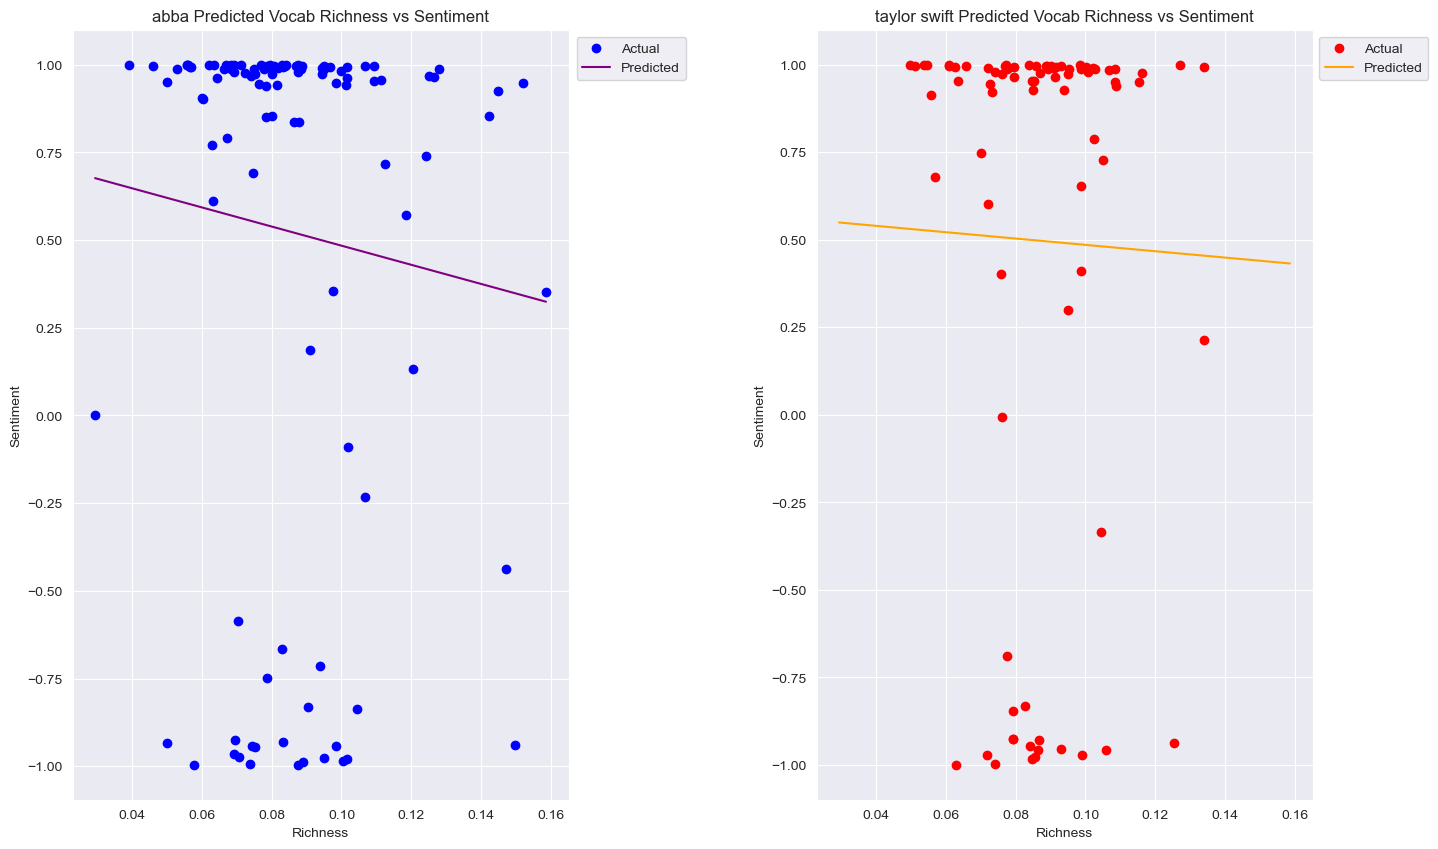

In [36]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fig, axs = plt.subplots(1, 2, figsize = (16, 10))
fig.subplots_adjust(wspace = .5)

#Linear Regression Model
model = LinearRegression()
#Train the model
x = df_artist1['richness'].values.reshape(-1, 1)
y = df_artist1['sentiment'].apply(lambda x: x[0])
model.fit(x, y)

# Predict y-value for 1,000 data points in range from the minimum to the maximum of artist 1's richness
u = np.linspace(df_artist1['richness'].min(), df_artist1['richness'].max(), 1000)
v = model.predict(u[:, np.newaxis])

#Plot the raw data and the predicted line
axs[0].set_xlabel('Richness')
axs[0].set_ylabel('Sentiment')
axs[0].set_title(f"{cleaned_group_df.index[0]} Predicted Vocab Richness vs Sentiment")
axs[0].scatter(x = df_artist1['richness'], y = y, color = 'blue', label = 'Actual')
axs[0].plot(u, v, color = 'purple', label = 'Predicted')
axs[0].legend(bbox_to_anchor=(1.25, 1.0))
print(f'y(x) = {model.intercept_:.3f} + {model.coef_[0]:.3f}x')

#Train the model
x1 = df_artist2['richness'].values.reshape(-1, 1)
y1 = df_artist2['sentiment'].apply(lambda x: x[0])
model.fit(x1, y1)

# Predict y-value for 1,000 data points in range from the minimum to the maximum of artist 2's richness
u = np.linspace(df_artist1['richness'].min(), df_artist1['richness'].max(), 1000)
v = model.predict(u[:, np.newaxis])

#Plot the raw data and the predicted line
axs[1].set_xlabel('Richness')
axs[1].set_ylabel('Sentiment')
axs[1].scatter(x = df_artist2['richness'], y = y1, color = 'red', label = 'Actual')
axs[1].plot(u, v, color = 'orange', label = 'Predicted')
axs[1].set_title(f"{cleaned_group_df.index[1]} Predicted Vocab Richness vs Sentiment")
plt.legend(bbox_to_anchor=(1, 1.0))
print(f'y(x) = {model.intercept_:.3f} + {model.coef_[0]:.3f}x')
plt.show()

Looking at ABBA and Taylor Swift, we can see a negative correlation in terms of Vocabulary Richness vs Sentiment for both artists. Using the predicted models of each plot, we can see ABBA has a negative slope of 2.729 and Taylor Swift has a negative slope of 0.907. This means that as their vocabulary richness increases, their sentiment score decreases. In other words, as their songs get more word diversity, the negativity of their song increases.

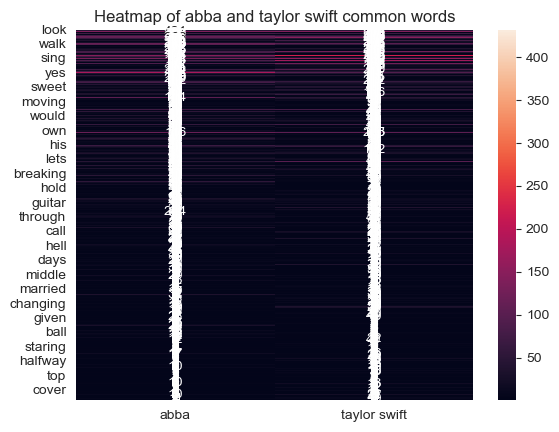

In [37]:
from collections import Counter
#Heatmap of only shared words
#Create an empty data frame
count_df = pd.DataFrame()

#function used to count how many of the common words appear for each artist
def count_common_words(lyrics):
    lyric_words = lyrics.split()
    word_counts = Counter(lyric_words)
    common_word_counts = {wrd: word_counts[wrd] for wrd in common_words}
    return common_word_counts

#Update the data frame 
count_df[cleaned_group_df.index[0]] = count_common_words(cleaned_group_df['text'][0]).values()
count_df[cleaned_group_df.index[1]] = count_common_words(cleaned_group_df['text'][1]).values()

count_df.index = common_words

sns.heatmap(count_df, annot=True, fmt='g')
plt.title(f'Heatmap of {cleaned_group_df.index[0]} and {cleaned_group_df.index[1]} common words')
plt.show()

In [38]:
'''from collections import Counter
#Heatmap of all words
count_df = pd.DataFrame()

def count_word_occurrences(lyrics):
    lyric_words = lyrics.split()
    word_counts = Counter(lyric_words)
    return word_counts

#Update the data frame 
count_df[cleaned_group_df.index[0]] = pd.Series(count_word_occurrences(cleaned_group_df['text'][0]).values())
count_df[cleaned_group_df.index[1]] = pd.Series(count_word_occurrences(cleaned_group_df['text'][1]).values())

#Create a set of unique words from the data frame
all_unique_words = set(count_df[cleaned_group_df.index[0]].index).union(set(count_df[cleaned_group_df.index[1]].index))
count_df = count_df.reindex(all_unique_words, fill_value=0)

heatmap_df = pd.DataFrame(columns=count_df.index, index=count_df.index)

#Count how many times common words appear
for artist1 in heatmap_df.index:
    for artist2 in heatmap_df.columns:
        count_common = len(set(count_df.loc[artist1].index) & set(count_df.loc[artist2].index))
        heatmap_df.at[artist1, artist2] = count_common

sns.heatmap(count_df, annot=True, fmt='g')
plt.title(f'Heatmap of {cleaned_group_df.index[0]} and {cleaned_group_df.index[1]} common words')
plt.show()'''

"from collections import Counter\n#Heatmap of all words\ncount_df = pd.DataFrame()\n\ndef count_word_occurrences(lyrics):\n    lyric_words = lyrics.split()\n    word_counts = Counter(lyric_words)\n    return word_counts\n\n#Update the data frame \ncount_df[cleaned_group_df.index[0]] = pd.Series(count_word_occurrences(cleaned_group_df['text'][0]).values())\ncount_df[cleaned_group_df.index[1]] = pd.Series(count_word_occurrences(cleaned_group_df['text'][1]).values())\n\n#Create a set of unique words from the data frame\nall_unique_words = set(count_df[cleaned_group_df.index[0]].index).union(set(count_df[cleaned_group_df.index[1]].index))\ncount_df = count_df.reindex(all_unique_words, fill_value=0)\n\nheatmap_df = pd.DataFrame(columns=count_df.index, index=count_df.index)\n\n#Count how many times common words appear\nfor artist1 in heatmap_df.index:\n    for artist2 in heatmap_df.columns:\n        count_common = len(set(count_df.loc[artist1].index) & set(count_df.loc[artist2].index))\n    

**Generating text**

Implement a text generator that allows the user to specify the number of n-grams
and generate two new songs based on the lyrics of the specified artists.

In [39]:
#N-gram generator
import random
def ngram(lyrics, n):
    words = lyrics.split()
    l_ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in l_ngrams]

In [40]:
#Get the number of n-grams desired from the user
gram = int(input("Enter the n-gram number: "))

In [41]:
#Create the list of n-grams
ngrams = ngram(cleaned_group_df['text'][0], gram)
ngrams1 = ngram(cleaned_group_df['text'][1], gram)

print(ngrams)

['look her face its', 'her face its wonderful', 'face its wonderful face', 'its wonderful face it', 'wonderful face it means', 'face it means something', 'it means something special', 'means something special look', 'something special look way', 'special look way that', 'look way that she', 'way that she smiles', 'that she smiles when', 'she smiles when she', 'smiles when she sees', 'when she sees how', 'she sees how lucky', 'sees how lucky can', 'how lucky can one', 'lucky can one fellow', 'can one fellow be', 'one fellow be shes', 'fellow be shes just', 'be shes just my', 'shes just my kind', 'just my kind girl', 'my kind girl she', 'kind girl she makes', 'girl she makes feel', 'she makes feel fine', 'makes feel fine who', 'feel fine who could', 'fine who could ever', 'who could ever believe', 'could ever believe that', 'ever believe that she', 'believe that she could', 'that she could be', 'she could be mine', 'could be mine shes', 'be mine shes just', 'mine shes just my', 'shes jus

In [42]:
#Song 1
for i in range(40):
    print(random.choice(ngrams))

park she holds squeezes
so took advantage fact
air gets cold then
new thank god its
lousy rotten show boy
say least youre doggone
waiting next bus travelling
new song chiquitita try
can dance honey if
playground stay away thats
sky carried first trade
jive having time your
man after midnight take
made my desk around
mean when give flash
was all about closed
disillusion disillusions now thats
leave now or never
times joy times sorrow
watch out watch out
please dont talk go
not know theres couple
chance lifetime yes will
behind ill always find
why why did ever
around quarter after nine
away our last summer
from vintage year he
all my memories those
loving lightwork all night
it have be falling
fernando if had do
one man one woman
it if it wasnt
hey helen hey hey
have dream song sing
openhearted was impossible case
through when go when
night is gone keep
dont we meet chat


In [43]:
#Song 2
for i in range(40):
    print(random.choice(ngrams1))

youre ever gonna be
just so much cant
his mind we both
this is last time
pretty everybody loves cool
find ill leave my
this time im telling
around but your life
no good could wait
song chorus cause cant
she throws shes ferocious
chimney tonight santa baby
but whole time im
wished them all away
its not kind ending
it all now that
not before knew how
way hate that stupid
words like knives swords
one single word they
back first time since
let know that its
time my life long
sorry my daddys gonna
back come back like
away from here were
under our feet ill
comes back burning red
love when get mad
like herwalk fragile line
york snow she got
that ah ah dont
my space never makes
youre here it rains
feet crumbs she throws
blurry never impressed by
knows that call cab
got are your shattered
never imagined wed end
complication miscommunications lead fall


**Reflection**

Write a reflection on your experience working on this project. Discuss the challenges
you encountered during the development of the application, the solutions you
implemented, and the lessons you learned from the project. Reflect on the
effectiveness of the techniques used and propose potential improvements for future
iterations.

A big challenge for me working on this project was creating the heatmap. Although I had worked with heatmaps in the past, I wasn't sure how to implement the dataset into the code. The main problem was that I couldn't figure out how to create a square 2D array of the common words between the two chosen artists. My first successful attempt at generating a heatmap gave me the x-axis as the artists and the y-axis as the common words. My solution consisted of creating a new data frame and updating it with the number of common words each artist had via a function I made. However, because there were so many common words, the heatmap had to condense most of them which made it hard to tell which words were actually used more often. This is something that I would like to improve on in future iterations by making the heatmap more clear and readable to users.
Another problem I had was with the linear regression model I created. Even though I had also worked with linear regression models before, I was still confused about what each function used to make it worked. I tried using sns.regplot at first because it seemed easier and more efficient. However after some testing and failures I started using LinearRegression from sklearn and tried to understand every part that makes up a linear regression model. I eventually figured it out and was able to make models of the vocabulary richness vs sentiment. If I could improve it I would try to use sns.regplot since it seems more effective and simpler than sklearn.
A lot of the other parts of the project were fairly simple since we had practiced them in the labs. Although there were some unfamiliar sections I hadn't worked a lot with yet like the sentiment analysis and word cloud, I reviewed the previous labs and researched online for solutions and eventually was able to figure it out. For the most part, the most time-consuming part of this project was combining all I had learned in class and adjusting the code based on my needs and the dataset.
Another improvement I would like to make is making the code faster. Because the dataset is so large, some of the code blocks take longer than I'd like so making them run faster would be a good improvement.
Overall I think I was able to implement what I learned in class fairly well and the techniques and skills I used such as pandas and seaborn helped me a lot in simplifying my code.